# Image Classification with Deep Learning  
## A Practical Introduction Using the Fashion-MNIST Dataset

## 1. Introduction

Image classification is a core problem in computer vision and a foundational application of deep learning. The task involves assigning a predefined label to an image based on its visual content. Unlike traditional machine learning approaches that rely on handcrafted features, deep learning models particularly Convolutional Neural Networks (CNNs) automatically learn hierarchical representations directly from raw image data. This ability makes CNNs especially effective for visual recognition tasks.

The Fashion-MNIST dataset is used as the experimental benchmark. Fashion-MNIST consists of grayscale images of clothing items and serves as a more realistic alternative to the classic handwritten digit MNIST dataset. While the images are relatively small (28×28 pixels), the dataset captures real-world challenges such as inter-class similarity and ambiguous visual patterns, making it well-suited for learning and evaluating convolutional neural networks.

## 2. Project Objectives

The primary objectives of this project are to:

- Understand the image classification problem from a deep learning perspective  
- Explore and preprocess image data for use in convolutional neural networks  
- Design and implement a CNN using TensorFlow and Keras  
- Train the model using appropriate optimization and regularization techniques  
- Evaluate model performance using accuracy and class-wise metrics  
- Analyze model strengths, weaknesses, and common sources of misclassification  

By the end of this project, a complete and reproducible image classification pipeline will be developed.

## 3. Tools and Technologies

The project is implemented using the following tools and libraries:

- **Python** for data processing and model development  
- **TensorFlow / Keras** for building and training deep learning models  
- **NumPy** for numerical operations  
- **Matplotlib and Plotly** for data visualization  
- **Scikit-learn** for evaluation metrics  

## 4. Project Structure

The project is organized into clearly defined phases, covering:

1. Dataset exploration and visualization  
2. Data preprocessing and normalization  
3. Convolutional neural network design  
4. Model training and regularization  
5. Performance evaluation and error analysis  
6. Model improvement and discussion of results  

Each phase builds on the previous one, ensuring a structured and incremental learning experience.

---



# Phase 1: Dataset Exploration and Visualization

In [1]:
# Importing Required Libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras



In [2]:
# Load the Fashion MNIST dataset
fashion_mnist = keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [3]:
# Inspecting dataset shapes
print("Training data shape:", X_train.shape)
print("Training labels shape:", y_train.shape)
print("Test data shape:", X_test.shape)
print("Test labels shape:", y_test.shape)


Training data shape: (60000, 28, 28)
Training labels shape: (60000,)
Test data shape: (10000, 28, 28)
Test labels shape: (10000,)


In [4]:
# Define class names for better readability
class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot""T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

In [5]:
# Have a look at pixel value distribution
print("Minimum pixel: ", X_train.min())
print("Maximum pixel: ", X_train.max())


Minimum pixel:  0
Maximum pixel:  255


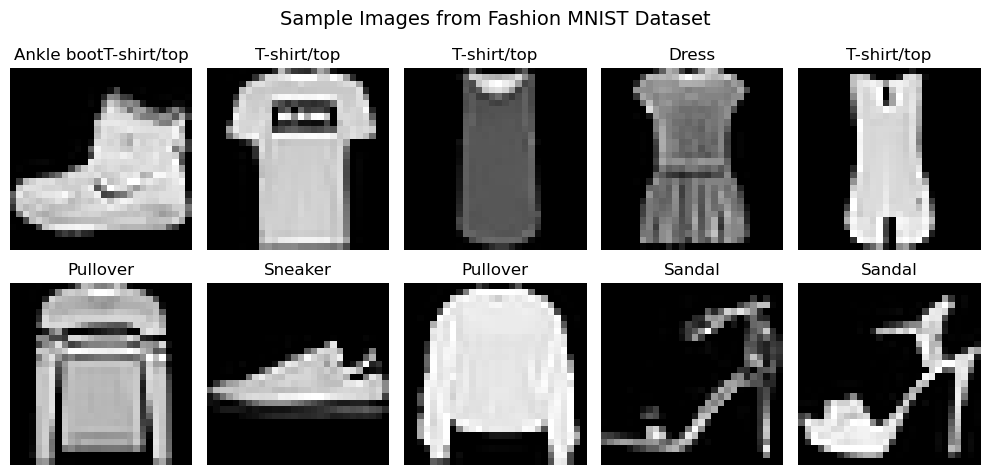

In [6]:
# Visualize sample images
plt.figure(figsize=(10, 5))

for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(class_names[y_train[i]])
    plt.axis('off')

plt.suptitle("Sample Images from Fashion MNIST Dataset", fontsize= 14)
plt.tight_layout()
plt.show()

**What is observed**
1. Some classes are visually distinct (Sneaker, Ankle boot)
2. Others overlap heavily (Shirt vs T-shirt vs Pullover)
3. This visual ambiguity explains future classification errors

In [7]:
# Class distribution check
unique, counts = np.unique(y_train, return_counts=True)

for label, count in zip(unique, counts):
    print(f"Class {class_names[label]}: {count} images")

Class T-shirt/top: 6000 images
Class Trouser: 6000 images
Class Pullover: 6000 images
Class Dress: 6000 images
Class Coat: 6000 images
Class Sandal: 6000 images
Class Shirt: 6000 images
Class Sneaker: 6000 images
Class Bag: 6000 images
Class Ankle bootT-shirt/top: 6000 images


No class imbalance bias

# Phase 2: Data Preprocessing for Convolutional Neural Networks

### Why Preprocessing Is Necessary

Convolutional Neural Networks are sensitive to the scale and structure of input data. Raw Fashion-MNIST pixel values range from 0 to 255; feeding these unscaled values into a network can cause:

- **Slower convergence** during training  
- **Unstable gradient updates**  
- **Poor numerical conditioning** during optimization

To address this, apply simple preprocessing:

- Normalize pixel values (e.g., divide by 255 to scale to [0, 1])  
- Reshape inputs to include a channel dimension expected by conv layers (e.g., (N, 28, 28, 1))

These steps improve training stability, speed, and model performance.

In [8]:
# Normalize pixel values
X_train_norm = X_train / 255.0
X_test_norm = X_test / 255.0


In [9]:
# Verify normalization
print("Training set - min:", X_train_norm.min(), "max:", X_train_norm.max())
print("Test set - min:", X_test_norm.min(), "max:", X_test_norm.max())

Training set - min: 0.0 max: 1.0
Test set - min: 0.0 max: 1.0


In [10]:
X_train_norm.min()

0.0

In [11]:
# Resgaeping data for model input
X_train_reshaped = X_train_norm.reshape(-1, 28, 28, 1)
X_test_reshaped = X_test_norm.reshape(-1, 28, 28, 1)

In [12]:
# Verify shapes after reshaping
print("Reshaped training data shape:", X_train_reshaped.shape)
print("Reshaped test data shape:", X_test_reshaped.shape)

Reshaped training data shape: (60000, 28, 28, 1)
Reshaped test data shape: (10000, 28, 28, 1)


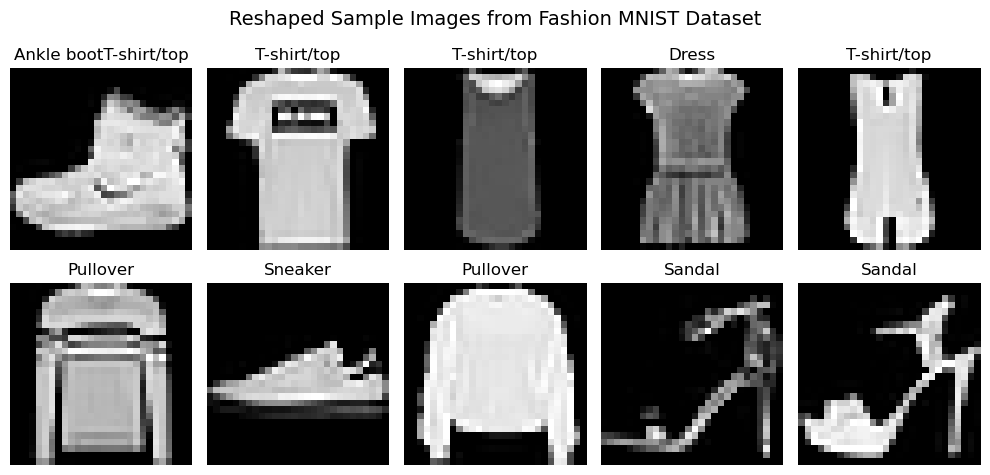

In [13]:
# Visualize reshaped imagea
plt.figure(figsize=(10, 5))

for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train_reshaped[i].squeeze(), cmap='gray')
    plt.title(class_names[y_train[i]])
    plt.axis('off')

plt.suptitle("Reshaped Sample Images from Fashion MNIST Dataset", fontsize= 14)
plt.tight_layout()
plt.show()

.squeeze() removes the channel dimension for visualization only.

The data itself still retains the (28, 28, 1) structure.

In [14]:
# Final preprocessing assertions
assert X_train_reshaped.shape[1:] == (28, 28, 1)
assert X_train_reshaped.min() >= 0.0
assert X_train_reshaped.max() <= 1.0



### Pre‑modeling assertions

These checks ensure:

- ✅ Correct input shape for CNN layers — (28 × 28 × 1)  
- ✅ Proper normalization — pixel values scaled to [0, 1]  
- ✅ Pipeline integrity — data validated before modeling

### Key Takeaways

- Normalization improves numerical stability and training efficiency.
- CNNs require a channel dimension, even for grayscale images.
- The shape (28, 28, 1) explicitly represents height, width, and channels.
- Preprocessing does not change the image content, only its numerical representation.
- Sanity checks are essential before model construction.


# Phase 3: Convolutional Neural Network (CNN) Fundamentals

# Baseline CNN Architecture Design

A compact, easy-to-train baseline that is expressive enough for Fashion‑MNIST while remaining fast to iterate on.

## Overview
- Two convolutional feature‑extraction blocks  
- One dense layer for pattern combination  
- One softmax output layer for 10‑way classification

## Recommended layer stack
- Input: 28 × 28 × 1 (grayscale)  
- Conv block 1: Conv2D(32, 3×3) → ReLU → BatchNormalization (optional) → MaxPool(2×2) → Dropout(0.25)  
- Conv block 2: Conv2D(64, 3×3) → ReLU → BatchNormalization (optional) → MaxPool(2×2) → Dropout(0.25)  
- Flatten  
- Dense: 128 → ReLU → Dropout(0.5)  
- Output: Dense(10) → Softmax


## Notes
- Use input normalization (0–1) and the (28,28,1) shape.  
- Keep batch size moderate (32–128) and use early stopping + model checkpointing.

In [15]:
from tensorflow.keras import layers, models

def cnn_model():
    model = models.Sequential([
        # First convolutional layer
        layers.Conv2D(
            filters= 32,
            kernel_size= (3, 3),
            activation= 'relu',
            input_shape= (28, 28, 1)
        ),
        layers.MaxPooling2D(pool_size= (2, 2)),

        # Second convolutional layer
        layers.Conv2D(
            filters= 64,
            kernel_size= (3, 3),
            activation= 'relu'
        ),
        layers.MaxPooling2D(pool_size= (2, 2)),

        # Classification head
        layers.Flatten(),
        layers.Dense(128, activation= 'relu'),
        layers.Dense(10, activation= 'softmax')
    ])

    return model

model = cnn_model()
model.summary()




c:\Users\HomePC\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

### Layer-by-layer breakdown

#### Conv2D — 32 filters, 3×3
- Learns 32 local patterns (kernels).  
- Input: **(28, 28, 1)** → Output (with default `padding='valid'`): **(26, 26, 32)**  
- Parameters: **(3×3×1 + 1) × 32 = 320**  
- Cheap and highly expressive for low-level features.

#### MaxPooling2D — 2×2
- Reduces spatial resolution by half (improves translation invariance).  
- No trainable parameters.

#### Conv2D — 64 filters, 3×3
- Learns more complex features from previous feature maps; depth increases 32 → 64.  
- Parameters: **(3×3×32 + 1) × 64 = 18,496**  
- Model capacity grows meaningfully here.

#### MaxPooling2D — 2×2
- Further spatial downsampling.  
- No trainable parameters.

#### Flatten
- Converts 3D feature maps into a 1D vector for the classifier head.  
- No trainable parameters.

#### Dense — 128 units
- Globally combines learned features; parameter-heavy and prone to overfitting.  
- Parameter count depends on flattened size. Example (common case with two 3×3 `valid` convs + 2×2 pools): final feature maps → 5×5×64 = 1600, so parameters = **(1600 + 1) × 128 = 204,928**.

#### Dense (Output) — 10 units, Softmax
- Produces class probabilities for 10 categories.  
- Example parameters (if previous dense has 128 units): **(128 + 1) × 10 = 1,290**.

Notes
- Parameter formulas include biases (+1).  
- Exact spatial sizes depend on `padding`, strides, and pooling positions; the counts above assume default `padding='valid'` and standard 2×2 pooling.


In [16]:
total_params = model.count_params()
print(f"Total parameters in the model: {total_params}")

Total parameters in the model: 225034


# Phase 4: Training Strategy and Regularization


# Overfitting vs Underfitting 

Before training, understand common failure modes:

## Underfitting
- Model too simple to capture data patterns  
- Symptoms: low training accuracy and low validation accuracy

## Overfitting
- Model memorizes training examples instead of learning generalizable features  
- Symptoms: high training accuracy with stagnant or declining validation accuracy

Regularization and proper training strategies (e.g., early stopping, dropout, data augmentation) help strike a balance between these extremes.

---

# Why Dropout Works
- Randomly deactivates a fraction of neurons during training, preventing co‑adaptation  
- Encourages the network to learn redundant, more robust representations  
- Reduces model variance and helps prevent overfitting

Note: Dropout is active only during training and disabled during inference.


In [17]:
# Updating the CNN with Dropout
def regularized_cnn():
    model = models.Sequential([
        # Feature Exraction Layers
        layers.Conv2D(32, (3, 3), activation= 'relu', input_shape= (28, 28, 1)),
        layers.MaxPooling2D(2, 2),

        layers.Conv2D(64, (3, 3), activation= 'relu'),
        layers.MaxPooling2D(2, 2),

        # Classification Head with Dropout
        layers.Flatten(),
        layers.Dropout(0.3),
        layers.Dense(128, activation= 'relu'),
        layers.Dense(10, activation = 'softmax')
    ])

    model.compile(
        optimizer= 'adam',
        loss= 'sparse_categorical_crossentropy',
        metrics= ['accuracy']  
    )

    return model

model = regularized_cnn()
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

# Training configuration notes

- Dropout — `Dropout(0.3)` is a moderate rate appropriate for mid‑sized dense layers; helps prevent co‑adaptation.  
- Optimizer — `Adam` adapts per‑parameter learning rates for efficient and stable convergence.  
- Loss — `sparse_categorical_crossentropy` matches integer‑encoded labels and is suitable for multi‑class classification.

In [18]:
validation_split = 0.2

### Validation split (80/20)

- **80%** of the training data used for learning  
- **20%** held out to monitor generalization

Guidelines
- Large enough to be representative of the data distribution  
- Small enough to preserve the training signal

> **Note:** The validation set is never seen during weight updates.

# Callbacks: Training with Guardrails

## EarlyStopping

Stops training when validation performance stops improving, preventing unnecessary computation and reducing overfitting.

**Key parameters:**
- `monitor` — Metric to track (e.g., `'val_loss'`)
- `patience` — Number of epochs with no improvement before stopping
- `restore_best_weights` — Restore weights from the best epoch

## ModelCheckpoint

Saves the model at regular intervals or when a monitored metric improves, enabling recovery of the best-performing model.

**Key parameters:**
- `filepath` — Path to save the model
- `monitor` — Metric to track
- `save_best_only` — Save only when the monitored metric improves
- `mode` — `'min'` for loss, `'max'` for accuracy




In [22]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

early_stop = EarlyStopping(
    monitor= "val_loss",
    patience= 3, 
    restore_best_weights= True
)

checkpoint = ModelCheckpoint(
    filepath = "best_cnn_model.keras",
    monitor= 'val_loss',
    save_best_only= True
)

Why patience=3?

Prevents premature stopping due to noise

Avoids wasted epochs once learning plateaus

In [24]:
# Training the Model
history = model.fit(
    X_train_reshaped,
    y_train,
    epochs= 30,
    batch_size= 64,
    validation_split= validation_split,
    callbacks= [early_stop, checkpoint],
    verbose= 1
)


Epoch 1/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 19s 25ms/step - accuracy: 0.9335 - loss: 0.1796 - val_accuracy: 0.9133 - val_loss: 0.2424
Epoch 2/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 16s 22ms/step - accuracy: 0.9359 - loss: 0.1735 - val_accuracy: 0.9189 - val_loss: 0.2300
Epoch 3/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 16s 22ms/step - accuracy: 0.9373 - loss: 0.1658 - val_accuracy: 0.9168 - val_loss: 0.2350
Epoch 4/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 19s 25ms/step - accuracy: 0.9400 - loss: 0.1544 - val_accuracy: 0.9171 - val_loss: 0.2373
Epoch 5/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 20s 26ms/step - accuracy: 0.9440 - loss: 0.1475 - val_accuracy: 0.9183 - val_loss: 0.2298
Epoch 6/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 18s 24ms/step - accuracy: 0.9489 - loss: 0.1350 - val_accuracy: 0.9191 - val_loss: 0.2438
Epoch 7/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 19s 21ms/step - accuracy: 0.9513 - loss: 0.1295 - val_accuracy: 0.9160 - val_loss: 0.2405
Epoch 8/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 16s 21ms/step - accuracy: 0.9550 - loss: 0.1227 - 

> **Training Details**

- `epochs=30` is an **upper bound**, not a fixed commitment.
- **EarlyStopping** determines the actual stopping point based on validation performance.
- **Batch size** balances training stability and computational efficiency.


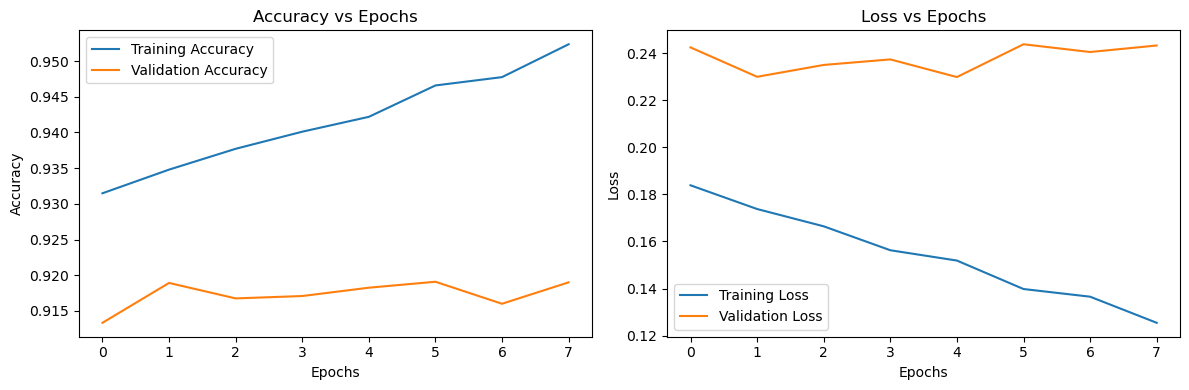

In [25]:
# Visualizing Training and Validation Curves
def plot_training_history(history):
    plt.figure(figsize= (12, 4))

    # Accuracy Plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history["accuracy"], label= "Training Accuracy")
    plt.plot(history.history["val_accuracy"], label= "Validation Accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.title("Accuracy vs Epochs")

    # Loss Plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history["loss"], label= "Training Loss")
    plt.plot(history.history["val_loss"], label= "Validation Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.title("Loss vs Epochs")

    plt.tight_layout()
    plt.show()

plot_training_history(history)